In [160]:
import pandas as pd
import numpy as np
import seaborn as sys
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [228]:
df = pd.read_csv("crime.csv")
df = df.drop_duplicates()
df["SHOOTING"].fillna("N", inplace = True)
df["Lat"].replace(-1, None, inplace=True)
df["Long"].replace(-1, None, inplace = True)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438265 entries, 0 to 439015
Data columns (total 17 columns):
INCIDENT_NUMBER        438265 non-null object
OFFENSE_CODE           438265 non-null int64
OFFENSE_CODE_GROUP     426089 non-null object
OFFENSE_DESCRIPTION    438265 non-null object
DISTRICT               436029 non-null object
REPORTING_AREA         438265 non-null object
SHOOTING               438265 non-null object
OCCURRED_ON_DATE       438265 non-null object
YEAR                   438265 non-null int64
MONTH                  438265 non-null int64
DAY_OF_WEEK            438265 non-null object
HOUR                   438265 non-null int64
UCR_PART               425983 non-null object
STREET                 424603 non-null object
Lat                    398858 non-null float64
Long                   398858 non-null float64
Location               438265 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 60.2+ MB


In [230]:
data = df[["INCIDENT_NUMBER", "DISTRICT","REPORTING_AREA","SHOOTING","Long", "Lat"]].drop_duplicates().dropna()
data

,INCIDENT_NUMBER,DISTRICT,REPORTING_AREA,SHOOTING,Long,Lat
3,I192082859,E18,519,N,-71.121563,42.259518
4,I192082751,E18,493,N,-71.116710,42.262092
5,I192082680,D14,794,N,-71.135096,42.352375
6,I192082577,D4,130,N,-71.076402,42.349476
7,I192079582,A15,47,N,-71.066551,42.381846
...,...,...,...,...,...,...
427209,I020691165-00,A1,77,N,-71.059765,42.361839
427210,I020674147-00,A1,77,N,-71.059765,42.361839
427211,I020669075-00,A1,77,N,-71.059765,42.361839
427212,I020662996-00,A1,77,N,-71.059765,42.361839


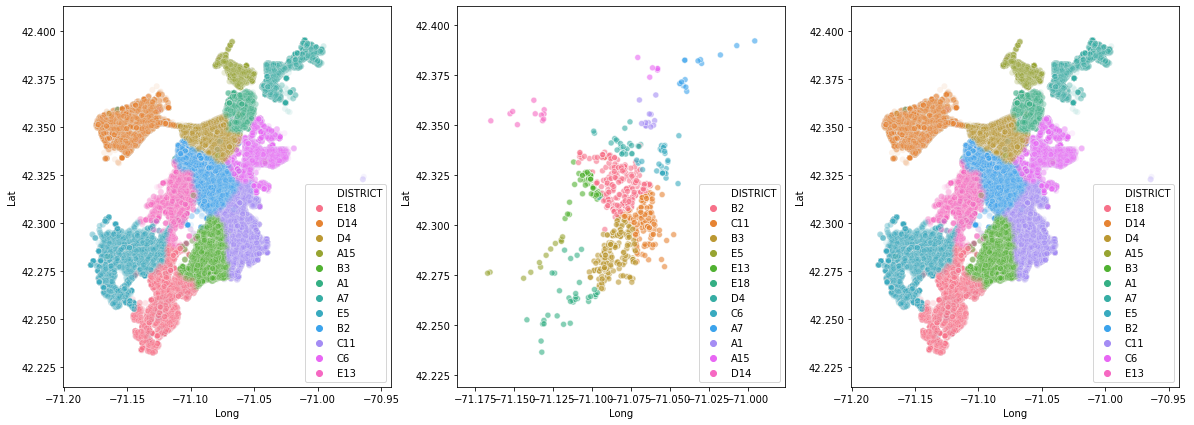

In [231]:
# security measurement
fig, axes = plt.subplots(1, 3,figsize = (20,7))
sys.scatterplot(y = "Lat", x = "Long", hue = "DISTRICT", alpha= 0.1, data = data, ax = axes[0])
shooting = data[data['SHOOTING']=="Y"]
sys.scatterplot(y = "Lat", x = "Long", hue = "DISTRICT", alpha= 0.6, data = shooting, ax = axes[1])
nonshooting = data[data['SHOOTING']=="N"]
sys.scatterplot(y = "Lat", x = "Long", hue = "DISTRICT", alpha= 0.1, data = nonshooting, ax = axes[2])

In [232]:
year_merge = df.groupby("INCIDENT_NUMBER")['MONTH'].count().sort_values()
sum_record = pd.DataFrame({'INCIDENT_NUMBER': year_merge.index, "NUM_OF_RECORDS": year_merge.values})
tem = df.merge(sum_record[sum_record['NUM_OF_RECORDS'] > 5], on = "INCIDENT_NUMBER", how = 'inner')
map_data = tem[["INCIDENT_NUMBER", "Long", "Lat"]].dropna()

In [226]:
start_lat, start_long = map_data["Lat"].mean(), map_data["Long"].mean()
map_sample = folium.Map(location = [map_data["Lat"].mean(), map_data['Long'].mean()])
mark = MarkerCluster()
for row in map_data.itertuples():
    mark.add_child(folium.Marker(location = [row.Lat, row.Long]))
map_sample.add_child(mark)